In [127]:
import numpy as np
import matplotlib.pyplot as plt

In [177]:
num_samples = 100
sine_scale = 2 # The number of sine waves

x = np.linspace(-1, 1, num_samples)
y = np.sin(x * sine_scale * np.pi)
x_smooth = np.linspace(-1, 1, 1000)
y_smooth = np.sin(x_smooth * sine_scale * np.pi)

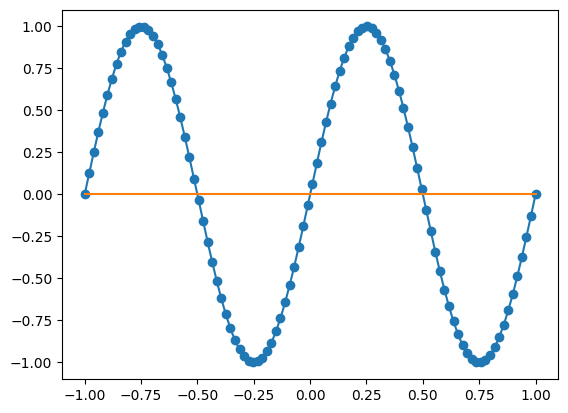

In [183]:

def plot_graph(polynomial_coefficients):
    polynomial = np.poly1d(polynomial_coefficients[::-1])
    p_smooth = polynomial(x_smooth)
    
    plt.plot(x_smooth, y_smooth)
    plt.plot(x_smooth, p_smooth)
    plt.scatter(x, y)
    plt.show()

degree = 6
polynomial_coefficients = np.zeros(degree + 1)
plot_graph(polynomial_coefficients)

In [184]:
def mse(polynomial_coefficients):
    polynomial = np.poly1d(polynomial_coefficients[::-1])
    p = polynomial(x)
    e = p - y
    return 1/(2*num_samples) * np.sum(e**2)

print(mse(polynomial_coefficients))

0.24749999999999997


In [185]:
X = np.vstack([x**i for i in range(degree + 1)]).T

def gradient(polynomial_coefficients):
    py = X @ polynomial_coefficients
    e = py - y
    gradient = (1/num_samples) * X.T @ e
    return gradient

print(gradient(polynomial_coefficients))


[5.19874942e-17 1.57351782e-01 2.32019265e-17 1.33405043e-01
 2.06540514e-17 8.96608930e-02 1.21430643e-17]


Step: ['5.2e-18', '0.0157', '2.32e-18', '0.0133', '2.07e-18', '0.00897', '1.21e-18']
New coefficients: ['-5.2e-18', '-0.0157', '-2.32e-18', '-0.0133', '-2.07e-18', '-0.00897', '-1.21e-18']
New MSE: 0.24257953781022737


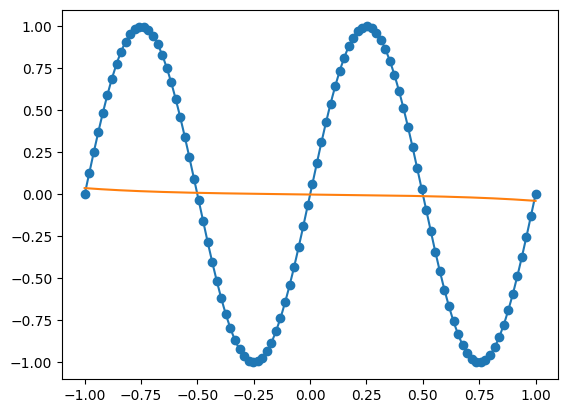

In [189]:
# Make a copy so I don't mess up original
coefficients = polynomial_coefficients.copy()

learning_rate = 0.1

step = learning_rate * gradient(coefficients)
print(f"Step: {[f'{x:.3g}' for x in step]}")

coefficients -= learning_rate * gradient(coefficients)
print(f"New coefficients: {[f'{x:.3g}' for x in coefficients]}")

print(f"New MSE: {mse(coefficients)}")
plot_graph(coefficients)


Epoch 0 - Error: 0.243
Epoch 10000 - Error: 0.0701
Epoch 20000 - Error: 0.0369
Epoch 30000 - Error: 0.0283
Epoch 40000 - Error: 0.0261
Epoch 50000 - Error: 0.0255
Epoch 60000 - Error: 0.0253
Epoch 70000 - Error: 0.0253
Epoch 80000 - Error: 0.0253
Epoch 90000 - Error: 0.0253
Final error: 0.0253


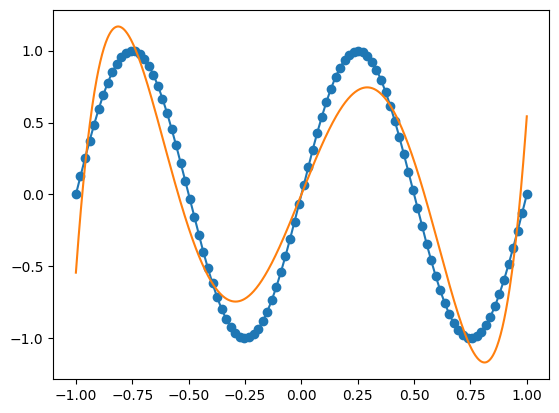

In [190]:
coefficients = polynomial_coefficients.copy()
epochs = 100_000

for epoch in range(epochs):
    step = learning_rate * gradient(coefficients)
    coefficients -= step
    error = mse(coefficients)
    if epoch % 10_000 == 0:
        print(f"Epoch {epoch} - Error: {error:.3g}")
    
print(f"Final error: {mse(coefficients):.3g}")
plot_graph(coefficients)